In [134]:
posts = []
from bs4 import BeautifulSoup
import requests
import json
hashtags = ['outfitoftheday','outfit','menoutfit','womenoutfit','ootdshare','outfitoftheday',
            'outfitpost','streetfashion','styleblogger','styleoftheday','stylish','todayimwearing','todaysoutfit',
            'trendy','whatiwore','whatiworetoday','wiw','wiwt','outfitoftheday', 'shoes','streetfashion', 'streetwear',
            'styleblogger', 'styleinspiration', 'stylish', 'tendencias', 'trend', 'trendalert', 'trending', 'trends',
            'trendsetter', 'trendy', 'clothes', 'currentlywearing', 'fashionable', 'fashionaddict', 'fashionblog',
            'fashiondaily', 'fashiondiaries', 'fashiongram', 'fashionlover', 'fashionpost']
for hashtag in hashtags:
    r  = requests.get("http://www.instagram.com/explore/tags/" + hashtag + "/?__a=1")
    data = json.loads(r.text)
    tags = ['edge_hashtag_to_media','edge_hashtag_to_top_posts']
    for tag in tags:
        for count,i in enumerate(data['graphql']['hashtag'][tags[0]]['edges']):
            posts.append(list([i['node']['display_url'], i['node']['taken_at_timestamp']]))

In [ ]:
len(posts)

In [ ]:
import csv

with open('ootd.csv', mode='w') as ootd_file:
    ootd_writer = csv.writer(ootd_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    for post in posts:
        ootd_writer.writerow(post)

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from random import shuffle
shuffle(posts) 
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for num,post in enumerate(posts[:100]):
    plt.subplot(10, 10, num+1)
    plt.axis('off')
    response = requests.get(post[0])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)

In [133]:
import os
import urllib.request

if not os.path.exists('img'):
    os.makedirs('img')
    
for img_i in posts:
    ts = datetime.fromtimestamp(img_i[1])
    if ts.year == 2018:
        if not os.path.exists('img/' + str(ts.month)):
            os.makedirs('img/' + str(ts.month))
        else:
            url = img_i[0]
            urllib.request.urlretrieve(url, os.path.join('img/' + str(ts.month), img_i[0][-12:]))

NameError: name 'datetime' is not defined

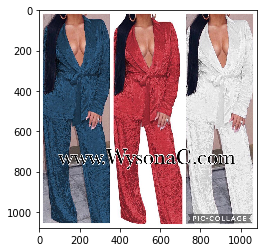

{'person': {'boundingBox': {'x': 336, 'y': 21, 'w': 386, 'h': 1047}, 'colors': [{'hex': '#ba3743', 'colorName': 'maroon', 'colorGeneralCategory': 'Red', 'ratio': 0.5882352941176471}, {'hex': '#952833', 'colorName': 'brown', 'colorGeneralCategory': 'Brown', 'ratio': 0.20588235294117646}], 'styles': [{'styleName': 'Eclectic', 'confidence': 0.26939131682726447}, {'styleName': 'Vintage', 'confidence': 0.15864766961184482}, {'styleName': 'Outdoor', 'confidence': 0.14603074364682092}], 'garments': []}}




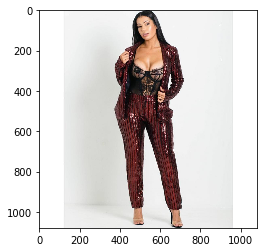

{'person': {'boundingBox': {'x': 343, 'y': 0, 'w': 412, 'h': 1073}, 'colors': [{'hex': '#592525', 'colorName': 'sepia', 'colorGeneralCategory': 'Brown', 'ratio': 0.28125}, {'hex': '#2f1a1b', 'colorName': 'ivory_black', 'colorGeneralCategory': 'Black', 'ratio': 0.375}], 'styles': [{'styleName': 'Sexy', 'confidence': 0.3812152580736057}, {'styleName': 'Elegant', 'confidence': 0.17564840311878985}, {'styleName': 'Business', 'confidence': 0.11380099058807266}], 'garments': [{'typeName': 'Jumpsuit', 'boundingBox': {'x': 395, 'y': 99, 'w': 343, 'h': 949}, 'confidence': 0.352829247713089}]}}




PermissionError: [Errno 13] Permission denied: 'img\\1'

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
file = os.listdir("img")
url = "https://fashion.recoqnitics.com/analyze"
accessKey = "bb79c31cb135797bb528"
secretKey = "1eddc4bafd3eeaaeab47d7a495c03b108ed1e6d4"
# access_key and secret_key
data = {'access_key': accessKey,
  'secret_key': secretKey}
for i in file:
    filedir = os.path.join('img', i)
    image = plt.imread(filedir)
    plt.imshow(image)
    plt.show()
    filename = {'filename': open(filedir,'rb')}
    r = requests.post(url, files = filename, data=data)
    content = json.loads(r.content)
    print(content)
    print("\n")

In [3]:
colors = []
styles = []
garments = []
text = {'person': {'boundingBox': {'x': 172, 'y': 8, 'w': 653, 'h': 987}, 'colors': [{'hex': '#88888a', 'colorName': 'cold_grey', 'colorGeneralCategory': 'Grey', 'ratio': 0.18461538461538463}, {'hex': '#c4c4c8', 'colorName': 'grey', 'colorGeneralCategory': 'Grey', 'ratio': 0.26153846153846155}, {'hex': '#b2b3b6', 'colorName': 'grey', 'colorGeneralCategory': 'Grey', 'ratio': 0.24615384615384617}], 'styles': [{'styleName': '90s', 'confidence': 0.3480224155763758}, {'styleName': 'Vintage', 'confidence': 0.16597631583087158}, {'styleName': 'Sexy', 'confidence': 0.1632248040415044}], 'garments': [{'typeName': 'Hoodie', 'boundingBox': {'x': 204, 'y': 61, 'w': 597, 'h': 892}, 'confidence': 0.9416541457176208}]}}
text = json.dumps(text)
text = json.loads(text) 

for i in text['person']['colors']:
    colors.append(i['colorName'])
for i in text['person']['styles']:
    styles.append(i['styleName'])
for i in text['person']['garments']:
    garments.append(i['typeName'])
    
from collections import Counter
color_top = Counter(colors).most_common(5)
style_top = Counter(styles).most_common(5)
garment_top = Counter(garments).most_common(5)

In [4]:
garment_top

[('Hoodie', 1)]

In [11]:
from time import sleep
from pathlib import Path

colors = []
styles = []
garments = []
counter = 0

my_file = Path("traits.csv")

file = os.listdir("img/11")
url = "https://fashion.recoqnitics.com/analyze"
accessKey = "bb79c31cb135797bb528"
secretKey = "1eddc4bafd3eeaaeab47d7a495c03b108ed1e6d4"
# access_key and secret_key
data = {'access_key': accessKey,
  'secret_key': secretKey}

for i in file:
    
#     print(counter)
    filedir = os.path.join('img/11', i)
    filename = {'filename': open(filedir,'rb')}
    
    r = requests.post(url, files = filename, data=data)
    counter = counter + 1
    
    print(r.content)
    content = json.loads(r.content)
    
    if len(content['person']) > 0: 
        for i in content['person']['colors']:
            colors.append(i['colorName'])
        for i in content['person']['styles']:
            styles.append(i['styleName'])
        for i in content['person']['garments']:
            garments.append(i['typeName'])
        
        
        with open('traits.csv', mode='w') as trait_file:
            trait_writer = csv.writer(trait_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
            trait_writer.writerow(colors)
            trait_writer.writerow(styles)
            trait_writer.writerow(garments)
    
    if counter == 10:
        print('Waiting for 60 secs..')
        sleep(60)
        counter = 0
        
from collections import Counter
color_top = Counter(colors).most_common(5)
style_top = Counter(styles).most_common(5)
garment_top = Counter(garments).most_common(5)

b'{"person":{"boundingBox":{"x":225,"y":14,"w":617,"h":1302},"colors":[{"hex":"#3e4239","colorName":"lamp_black","colorGeneralCategory":"Black","ratio":0.22641509433962265},{"hex":"#825e49","colorName":"dim_grey","colorGeneralCategory":"Grey","ratio":0.24528301886792453},{"hex":"#99867a","colorName":"beige","colorGeneralCategory":"Brown","ratio":0.18867924528301888},{"hex":"#321e15","colorName":"ivory_black","colorGeneralCategory":"Black","ratio":0.24528301886792453}],"styles":[{"styleName":"Rocker","confidence":0.22363552327737848},{"styleName":"Eclectic","confidence":0.12282545572111862},{"styleName":"Casual","confidence":0.10697730515099989}],"garments":[]}}\n'
b'{"person":{"boundingBox":{"x":2,"y":38,"w":570,"h":1158},"colors":[{"hex":"#d2b19b","colorName":"tan","colorGeneralCategory":"Brown","ratio":0.2236842105263158},{"hex":"#1f1513","colorName":"ivory_black","colorGeneralCategory":"Black","ratio":0.18421052631578946},{"hex":"#f3e4d2","colorName":"antique_white","colorGeneralCat

b'{"person":{"boundingBox":{"x":14,"y":12,"w":595,"h":426},"colors":[{"hex":"#49374a","colorName":"lamp_black","colorGeneralCategory":"Black","ratio":0.25},{"hex":"#7062a2","colorName":"violet","colorGeneralCategory":"Magenta","ratio":0.19444444444444445},{"hex":"#36221d","colorName":"ivory_black","colorGeneralCategory":"Black","ratio":0.2361111111111111},{"hex":"#604a71","colorName":"slate_blue_dark","colorGeneralCategory":"Blue","ratio":0.19444444444444445}],"styles":[{"styleName":"Eclectic","confidence":0.16983409472789013},{"styleName":"Bohemian","confidence":0.13201394514860665},{"styleName":"Romantic","confidence":0.13035072099417172}],"garments":[]}}\n'
b'{"person":{"boundingBox":{"x":277,"y":96,"w":562,"h":972},"colors":[{"hex":"#f4f7f5","colorName":"white_smoke","colorGeneralCategory":"White","ratio":0.4},{"hex":"#e9decc","colorName":"gainsboro","colorGeneralCategory":"White","ratio":0.16363636363636364},{"hex":"#e3b498","colorName":"burlywood","colorGeneralCategory":"Brown","

b'{"person":{"boundingBox":{"x":250,"y":17,"w":452,"h":1153},"colors":[{"hex":"#453934","colorName":"lamp_black","colorGeneralCategory":"Black","ratio":0.16417910447761194},{"hex":"#695950","colorName":"dim_grey","colorGeneralCategory":"Grey","ratio":0.3582089552238806},{"hex":"#80736a","colorName":"warm_grey","colorGeneralCategory":"Grey","ratio":0.2537313432835821}],"styles":[{"styleName":"Eclectic","confidence":0.18954975832636176},{"styleName":"Bohemian","confidence":0.17961610311145765},{"styleName":"Vintage","confidence":0.1331694121285666}],"garments":[{"typeName":"Jumpsuit","boundingBox":{"x":262,"y":202,"w":418,"h":897},"confidence":0.5184199810028076}]}}\n'
b'{"person":{"boundingBox":{"x":98,"y":0,"w":965,"h":957},"colors":[{"hex":"#a5a1a0","colorName":"beige","colorGeneralCategory":"Brown","ratio":0.18032786885245902},{"hex":"#bfbec2","colorName":"grey","colorGeneralCategory":"Grey","ratio":0.16393442622950818},{"hex":"#ceced2","colorName":"light_grey","colorGeneralCategory"

KeyboardInterrupt: 

## Read in traits file

In [16]:
import pandas as pd
traits = pd.read_csv('traits - Copy.csv', header=None)

In [112]:
colors = traits.iloc[0]
styles = traits.iloc[1]
garments = traits.iloc[2]

from collections import Counter
color_top = Counter(colors).most_common(20)
style_top = Counter(styles).most_common(20)
garment_top = Counter(garments).most_common(20)

In [113]:
color_top

[('ivory_black', 152),
 ('dim_grey', 54),
 ('lamp_black', 47),
 ('grey', 38),
 ('beige', 30),
 ('black', 29),
 ('rosy_brown', 26),
 ('warm_grey', 24),
 ('slate_grey_dark', 24),
 ('light_grey', 21),
 ('tan', 20),
 ('deep_ochre', 16),
 ('gainsboro', 16),
 ('sienna', 15),
 ('sepia', 13),
 ('peru', 12),
 ('cold_grey', 10),
 ('brown_ochre', 8),
 ('burlywood', 6),
 ('lavender', 6)]

In [114]:
style_top

[('Casual', 98),
 ('Eclectic', 93),
 ('90s', 68),
 ('Business', 55),
 ('Bohemian', 53),
 ('Vintage', 50),
 ('Rocker', 48),
 ('Sexy', 47),
 ('Outdoor', 42),
 ('Elegant', 33),
 ('Romantic', 31),
 ('Denim', 30),
 (nan, 6)]

In [110]:
garment_top

[(nan, 472),
 ('Jacket', 28),
 ('Skirt', 22),
 ('Tee', 21),
 ('Jeans', 14),
 ('Dress', 14),
 ('Blouse', 13),
 ('Sweatpants', 11),
 ('Jumpsuit', 8),
 ('Coat', 6),
 ('Cardigan', 6),
 ('Sweater', 6),
 ('Shorts', 6),
 ('Tank', 6),
 ('Leggings', 5),
 ('Blazer', 5),
 ('Hoodie', 4),
 ('Romper', 3),
 ('Robe', 2),
 ('Flannel', 1)]

In [62]:
import random
traits_out = []
for i in range(6):
    traits_out.append(list([color_top[i][0], style_top[random.randint(0,5)][0], garment_top[random.randint(1,3)][0]]))
print(traits_out)

[['ivory_black', '90s', 'Tee'], ['dim_grey', 'Vintage', 'Tee'], ['lamp_black', 'Casual', 'Skirt'], ['grey', 'Business', 'Jacket'], ['beige', 'Vintage', 'Jacket'], ['black', '90s', 'Skirt']]


## Generate Sample Image Urls

In [63]:
a = traits_out[0]

In [67]:
'+'.join(a)

'ivory_black+90s+Tee'

In [84]:
from bs4 import BeautifulSoup
import requests
import re
import urllib.request
import os
import argparse
import sys
import json

#googr.py -s "search terms" -n noimg

def get_soup(url,header):
    return BeautifulSoup(urllib.request.urlopen(urllib.request.Request(url,headers=header)),'html.parser')

def get_image(traits):
    out = []
    image_type="Action"
    numOfTraits = len(traits)
    for tr in traits:
        query='+'.join(tr)
        url="https://www.google.com/search?q="+query+"&source=lnms&tbm=isch"
        header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"}
        soup = get_soup(url,header)
        ActualImages=[]# contains the link for Large original images, type of  image
        for a in soup.find_all("div",{"class":"rg_meta"}):
            link =json.loads(a.text)["ou"]
            ActualImages.append(link)
        out.append(ActualImages[0])
    return out

In [85]:
get_image(traits_out)

['http://dpegb9ebondhq.cloudfront.net/product_photos/13653733/forever-21-ivoryblack-city-of-angels-muscle-tee-product-2-11810596-864490847_original.jpeg',
 'https://cdn.shopify.com/s/files/1/0605/2289/products/mockup-381eb240_2048x.jpg?v=1522349806',
 'https://media.dorothee-schumacher.com/media/image/f7/aa/36/multi-colour-roecke-dorothee-schumacher-183-143305-019-2-1.jpg?auto=format&dpr=1&crop=false&fit=clip&w=300&h=1',
 'https://ae01.alicdn.com/kf/HTB1c0TcKVXXXXX0XXXXq6xXFXXXe/Fashion-Design-Dark-Grey-Groomsman-Suit-Business-Suit-Men-Wedding-Suits-Groom-Tuxedos-Jacket-Pant-Tie.jpg',
 'https://i.ebayimg.com/images/g/dB8AAOSwX~dWn3AQ/s-l300.jpg',
 'https://i.pinimg.com/originals/09/58/d4/0958d4a476873fb7afbc166aad3a7983.jpg']

In [99]:
type(garment_top[1][0])

str

In [116]:
[i[0] for i in style_top if type(i[0]) == str]

['Casual',
 'Eclectic',
 '90s',
 'Business',
 'Bohemian',
 'Vintage',
 'Rocker',
 'Sexy',
 'Outdoor',
 'Elegant',
 'Romantic',
 'Denim']

In [ ]:
{
    "male": {
        "oct": {
            "img": [
                {
                    "url": "https://mivintagelabel.com/wp-content/uploads/2017/10/78A3226_1.jpg",
                    "traits": ["dim_grey", "gainsboro", "Denim", "Eclectic", "Casual", "Jeans"]
                },
                {
                    "url": "https://cdn.lookastic.com/looks/blazer-long-sleeve-shirt-chinos-large-20918.jpg",
                    "traits": ["beige", "Romantic", "Jacket", "Casual"]
                },
                {
                    "url": "https://smhttp-ssl-33667.nexcesscdn.net/manual/wp-content/uploads/2018/02/man-wearing-white-t-shirt-mens.jpg",
                    "traits": ["Sweatpants", "Tee", "Hoodie", "Black", "Grey", "Casual"]
                }
            ]
            "traits": {
                "color": ["ivory_black", "dim_grey", "lamp_black", "grey", "beige"],
                "style": ["Casual", "Romantic", "90s"],
                "garment": ["Tee", "Jeans", "Sweatpants", "Hoodie", "Jacket"]
            }
        }
        "nov": {
            "img": [
                {
                    "url": "https://mivintagelabel.com/wp-content/uploads/2017/10/78A3226_1.jpg",
                    "traits": ["dim_grey", "gainsboro", "Denim", "Eclectic", "Casual", "Jeans"]
                },
                {
                    "url": "https://www.e-outdoor.co.uk/images/barbour-mens-swainby-jacket-p3295-20308_image.jpg",
                    "traits": ["olive", "ivory_black", "olive_green_dark", "Casual","Outdoor", "Jacket"]
                },
                {
                    "url": "https://cdn.shopify.com/s/files/1/0978/2406/products/m-s-full-zipper-hoodie-for-men-rosy-brown-be6177.jpg?v=1539589131",
                    "traits": ["beige", "rosy_brown", "Hoodie", "Casual", "Elegant"]
                }
            ]
            "traits": {
                "color": ["ivory_black", "dim_grey", "rosy_brown", "denim", "deep_ochre"],
                "style": ["Casual", "Business", "Outdoor"],
                "garment": ["Jacket", "Tee", "Jeans", "Sweatpants", "Coat"]
            }
    }
    "female": {
        "oct": {
            "img": [
                {
                    "url": "https://cdn.shopify.com/s/files/1/0540/8445/products/boka_top_hot22454_wd_13.jpg?v=1534828624",
                    "traits": ["lamp_black", "dim_grey", "Business", "Blazer", "Jacket"]
                },
                {
                    "url": "https://static-v3.fashionvalet.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/7/07_c_3.jpg",
                    "traits": ["beige", "antique_white", "Elegant", "Bohemian", "Robe"]
                },
                {
                    "url": "https://images.bubbleroom.eu/data/product/raw/vero-moda-lizz-bralette-sepia-rose_1.jpg",
                    "traits": ["peru" ,"rosy_brown", "slate_grey_light", "Sexy", "Romantic", "Shorts"]
                }
            ]
            "traits": {
                "color": ["ivory_black", "dim_grey", "black", "grey", "beige", "sepia"],
                "style": ["Casual", "Business", "Sexy"],
                "garment": ["Blouse", "Tee", "Skirt", "Shorts", "Jeans"]
            }
        }
        "nov": {
            "img": [
                {
                    "url": "https://qph.fs.quoracdn.net/main-qimg-bbfaf57ca261411acca22107b2a90905-c",
                    "traits": ["ivory_black", "Elegant", "Business", "Dress"]
                },
                {
                    "url": "https://bec2df9eb90bb6604cfc-660d71a7a33bc04488a7427f5fddcedf.ssl.cf3.rackcdn.com/uploads/product_image/photo/5744074cec604670a6000105/large_a58ed1f0-b9ce-4c04-a272-84b9293c069c_huge.jpg",
                    "traits": ["beige", "wheat", "Outdoor", "Business", "Coat" , "Jacket"]
                },
                {
                    "url": "https://www.lulus.com/images/product/w_560/2373412_472502.jpg",
                    "traits": ["gainsboro", "ivory_black", "Elegant", "Sexy", "Dress"]
                }
            ]
            "traits": {
                "color": ["ivory_black", "dim_grey", "lamp_black", "grey", "beige"],
                "style": ["90s", "Business", "Elegant"],
                "garment": ["Jacket", "Skirt", "Jeans", "Dress", "Blouse"]
            }
    }    
}

In [131]:
file = os.listdir("img/test/male")
url = "https://fashion.recoqnitics.com/analyze"
accessKey = "bb79c31cb135797bb528"
secretKey = "1eddc4bafd3eeaaeab47d7a495c03b108ed1e6d4"
# access_key and secret_key
data = {'access_key': accessKey,
  'secret_key': secretKey}

for i in file:
    
#     print(counter)
    filedir = os.path.join('img/test/male', i)
    filename = {'filename': open(filedir,'rb')}
    
    r = requests.post(url, files = filename, data=data)
    counter = counter + 1
    
    print(r.content)
    content = json.loads(r.content)
    
    if len(content['person']) > 0: 
        for i in content['person']['colors']:
            print(i['colorName'])
        for i in content['person']['styles']:
            print(i['styleName'])
        for i in content['person']['garments']:
            print(i['typeName'])

b'{"person":{"boundingBox":{"x":561,"y":47,"w":957,"h":2877},"colors":[{"hex":"#45556c","colorName":"slate_grey_dark","colorGeneralCategory":"Grey","ratio":0.19402985074626866},{"hex":"#e0dfe1","colorName":"gainsboro","colorGeneralCategory":"White","ratio":0.4925373134328358}],"styles":[{"styleName":"Denim","confidence":0.18236364767852312},{"styleName":"Eclectic","confidence":0.16409305723808415},{"styleName":"Casual","confidence":0.16231590707916455}],"garments":[{"typeName":"Jeans","boundingBox":{"x":598,"y":969,"w":887,"h":1683},"confidence":0.36859482526779175}]}}\n'
slate_grey_dark
gainsboro
Denim
Eclectic
Casual
Jeans
b'{"person":{"boundingBox":{"x":150,"y":0,"w":542,"h":810},"colors":[{"hex":"#4e4d34","colorName":"olive","colorGeneralCategory":"Green","ratio":0.24358974358974358},{"hex":"#3a3725","colorName":"ivory_black","colorGeneralCategory":"Black","ratio":0.20512820512820512},{"hex":"#626044","colorName":"olive_green_dark","colorGeneralCategory":"Green","ratio":0.307692307